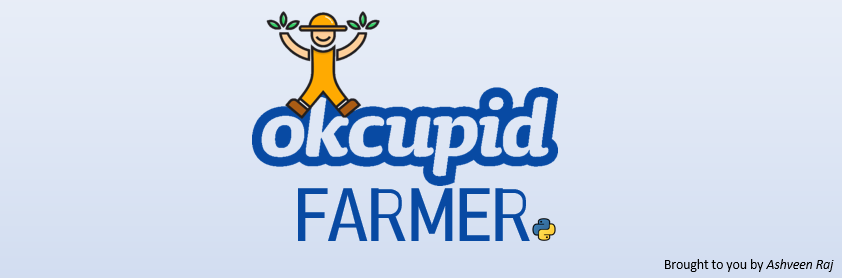

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import re
import pandas as pd
import numpy as np
from datetime import datetime
from playsound import playsound
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [ ]:
#Start an instance and Log-In

PATH = "C:\Program Files (x86)\chromedriver.exe"
driver=webdriver.Chrome(PATH)
driver.get("https://www.okcupid.com/home")

#Input username
try:
    search = WebDriverWait(driver,10).until(
    EC.presence_of_element_located((By.NAME,"username"))
    )
    
finally:
    search.send_keys("john.doe@gmail.com")  #Replace with your username

#Input password
try:
    search = WebDriverWait(driver,10).until(
    EC.presence_of_element_located((By.NAME,"password"))
    )
    
finally:
    search.send_keys("password")  #Replace with your password
    search.send_keys(Keys.RETURN)

In [ ]:
#Set up meta-data containers

df = pd.DataFrame(columns = ['Profile', 'Message'])
ProName=[]
MessageContent=[]

#Build Regular Expression to remove Emoji occurances from profile names

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)


----

### Using a sample size of 100 profiles. We observe derive the most common profile labels

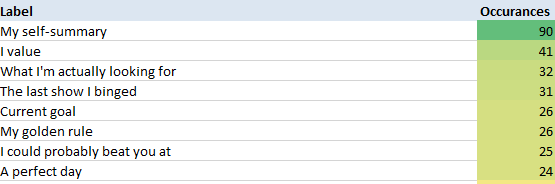

#### We will base our automated messages based on the assumption that every profile will contain 'My-self-summary' 

## Run this loop on the DoubleTake (Mainscreen)

#### Set for loop to # of profiles you would like to Iterate through

In [ ]:
for i in range(0,31):
    try:
    
        #Capture name from outer profile
        Name=driver.find_element_by_xpath("""//*[@id="main_content"]/div[3]/div/div[1]/div/div/div/div/div[1]/div[1]/span[1]""")
        Attribute_Name=Name.text
        Attribute_Name=(emoji_pattern.sub(r'', Attribute_Name))


        #Capture match % from outer profile
        MatchPct=driver.find_element_by_xpath("""//*[@id="main_content"]/div[3]/div/div[1]/div/div/div/div/div[1]/div[1]/span[4]""")
        Percentage_Amount=MatchPct.text

        #From the inner profile, scrape all labels and compile into list

        a="""//*[@id="main_content"]/div[3]/div/div[2]/div/div["""
        c="]/h2"
        attribute_list=[]

        for i in range(1,20):
            try:
                b=str(i)
                xpath=a+b+c
                label=driver.find_element_by_xpath(xpath)
                label_text=label.text
                attribute_list.append(label_text)
            except:
                pass


        # Build variables for most commonly occuring labels

        a='I value'
        b="What I'm actually looking for"
        c="The last show I binged"
        d="Current goal"
        e="My golden rule"
        f="A perfect day"


        #Build responses to presence of labels

        aa="I admire what you've listed as your Values. Where does it Stem from. "

        bb="I find that what we're looking for has alot in common. Probably thats we have a  "+Percentage_Amount+". "

        cc="You have good taste in Tv Shows. "

        dd="What you've listed as your goals is inspiring. "

        ee="Amongst all of the Golden Rules I've came across, yours is the most virtuous. "

        ff="Your idea of a perfect day is lovely. "



        #Construct first/last part of the Message

        Head='Hi ' + Attribute_Name +"!" + " You have a lovely profile , it definitely stands out from the rest of them. "
        Tail="I'm not sure if this message gets through to you , but certainly hope so. Hope to hear back from you " + Attribute_Name
        MainBody=''


        #If 'My self-summary' is the only attribute present, construct generic message
        if len(attribute_list)==1:
            MainBody=Head + Tail


        if len(attribute_list)>1:
            attribute_count=0

            if a in attribute_list:
                MainBody=aa
                attribute_count=attribute_count+1

            if f in attribute_list:
                MainBody=MainBody+ff
                attribute_count=attribute_count+1

            if attribute_count<3:
                if c in attribute_list:
                    MainBody=MainBody+cc
                    attribute_count=attribute_count+1


            if attribute_count<3:
                if d in attribute_list:
                    MainBody=MainBody+dd
                    attribute_count=attribute_count+1


            if attribute_count<3:
                if e in attribute_list:
                    MainBody=MainBody+ee
                    attribute_count=attribute_count+1


            if attribute_count<3:
                if b in attribute_list:
                    MainBody=MainBody+bb
                    attribute_count=attribute_count+1


            MainBody=Head+MainBody+Tail

        
        
        PageDump=str(driver.page_source)
        
        if "They like you!" in PageDump:
            Pass=driver.find_element_by_xpath("""//*[@id="main_content"]/div[3]/div/div[1]/div/div/div/div/div[1]/div[2]/button[1]""")
            Pass.click()
            time.sleep(3)
            continue
            
        else:
            pass
        
        
        if "written anything yet" in PageDump:
            Pass=driver.find_element_by_xpath("""//*[@id="main_content"]/div[3]/div/div[1]/div/div/div/div/div[1]/div[2]/button[1]""")
            Pass.click()
            time.sleep(3)
            continue
            
        else:
            pass
            
        
        
        
        
        try:
            search = WebDriverWait(driver,10).until(
            EC.presence_of_element_located((By.XPATH,"""//*[@id="main_content"]/div[3]/div/div[1]/div/div/div/div/div[1]/div[1]/span[5]/a"""))
            )

        finally:
            search.click()

        

        try:
            search = WebDriverWait(driver,4).until(
            EC.presence_of_element_located((By.XPATH,"""//*[@id="main_content"]/div[3]/div[1]/div[1]/div/button/span"""))
            )

            search.click()
        except:
            pass

        try:
            search = WebDriverWait(driver,10).until(
            EC.presence_of_element_located((By.XPATH,"""//*[@id="main_content"]/div[3]/div[1]/div[1]/div/div/button"""))
            )

            search.click()

        except:
            search = WebDriverWait(driver,10).until(
            EC.presence_of_element_located((By.XPATH,"""/html/body/div[1]/main/div[1]/div[2]/div/div/div[3]/span/div/button[1]"""))
            )
            search.click()
            continue


            #try:
                #search = WebDriverWait(driver,10).until(
                #EC.presence_of_element_located((By.XPATH,"""//*[@id="main_content"]/div[3]/div[1]/div[1]/div/div/button"""))
                #)

            #finally:
                #search.click()


        time.sleep(5)


        try:
            search = WebDriverWait(driver,10).until(
            EC.presence_of_element_located((By.XPATH,"""//*[@id="main_content"]/div[4]/div[2]/div[2]/div/div/div/div/div/div/div[2]/textarea"""))
            )
        
        

        finally:
            search.send_keys(MainBody)

        time.sleep(2)

        try:
            search = WebDriverWait(driver,10).until(
            EC.presence_of_element_located((By.XPATH,"""//*[@id="main_content"]/div[4]/div[2]/div[2]/div/div/div/div/div/div/div[3]/button"""))
            )

        finally:
            search.click()


        ProName.append(Attribute_Name)
        MessageContent.append(MainBody)

        time.sleep(1)


        try:
            search = WebDriverWait(driver,10).until(
            EC.presence_of_element_located((By.XPATH,"""//*[@id="main_content"]/div[4]/div[2]/div[2]/div/div/div/div/div/div/div[1]/button/span"""))
            )

        finally:
            search.click()

        #Scroll back to top of page to reveal Home-Page button
        driver.find_element_by_tag_name('body').send_keys(Keys.CONTROL + Keys.HOME)

        try:
            search = WebDriverWait(driver,10).until(
            EC.presence_of_element_located((By.XPATH,"""//*[@id="navigation"]/div/span[1]/h1/a/span[1]"""))
            )

        finally:
            search.click()
            
        playsound('C:\\Users\\John.Doe\\Music\\beep.mp3')
        print(len(ProName))
    
    except:
        break




    
playsound('C:\\Users\\John.Doe\\Music\\beep2.mp3')    
df.Profile=ProName
df.Message=MessageContent

#Export Unique report 

date=datetime.now()
Date=(str(date.day)+"-"+str(date.month)+"-"+str(date.year))
RunID=str(np.random.randint(999))
File_Name="OKC Farmer "+Date+" "+RunID+".xlsx"
df.to_excel((File_Name),index=False)

